# Improve MNIST with Convolutions

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Getting and checking the data

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# Check data shape
shape = x_train.shape
print(f'Training dataset contains {shape[0]} images of {shape[1]}x{shape[2]} pixels')
# Check data example
np.set_printoptions(linewidth=116)
index = 3
print(f'Image label is {y_train[index]}')
print('The image is\n', x_train[index])

Training dataset contains 60000 images of 28x28 pixels
Image label is 1
The image is
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127 251 251 253  62   0   0   0   0   0

In [12]:
# Normalize the data
x_train =  x_train/255
x_test = x_test/255

In [16]:
# Check data after normalization
np.set_printoptions(precision=3, linewidth=172)
print('The image label is', y_train[index])
print(f'The image is\n {x_train[index]}')

The image label is 1
The image is
 [[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    

## Creating a callback

In [17]:
# Define the callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.995:
      print('Stop training since accuracy exceeds 99.5%')
      self.model.stop_training=True

## Reshaping the data

In [ ]:
# Reshape data
x_train.reshape(60000, 28, 28, 1)
x_test.reshape(10000, 28, 28, 1)

## Building and training a CNN

In [22]:
# Build a model
model = tf.keras.models.Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10),
])
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
callbacks=myCallback()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               5538304   
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 5544074 (21.15 MB)
Trainable params: 5544074 (21.15 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [23]:
# Run the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 235s 125ms/step - loss: 0.1172 - accuracy: 0.9638 - val_loss: 0.0571 - val_accuracy: 0.9812
Epoch 2/10
1875/1875 [==============================] - 243s 130ms/step - loss: 0.0384 - accuracy: 0.9886 - val_loss: 0.0529 - val_accuracy: 0.9826
Epoch 3/10
1875/1875 [==============================] - 237s 126ms/step - loss: 0.0226 - accuracy: 0.9926 - val_loss: 0.0446 - val_accuracy: 0.9868
Epoch 4/10
1875/1875 [==============================] - 203s 109ms/step - loss: 0.0128 - accuracy: 0.9959 - val_loss: 0.0469 - val_accuracy: 0.9852


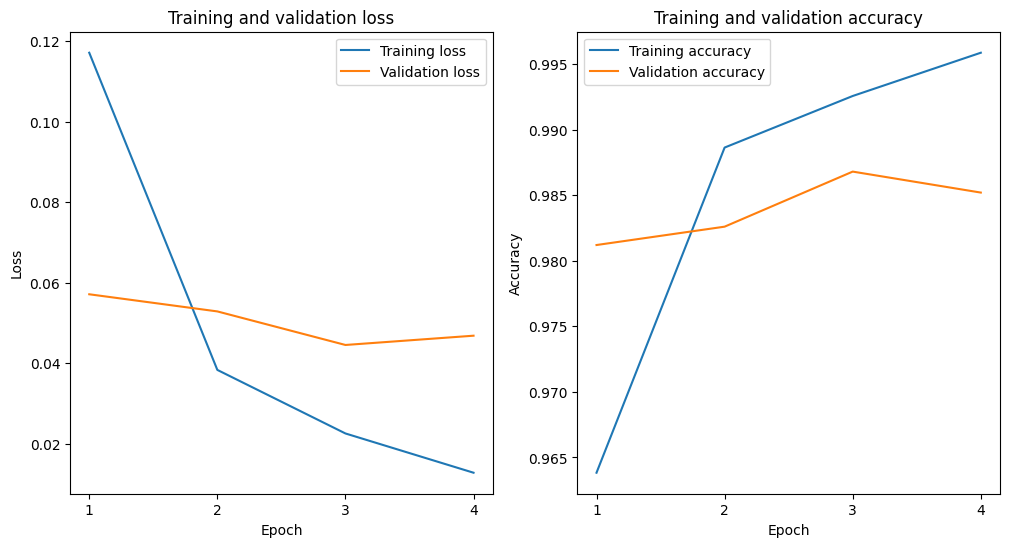

In [39]:
# Plot model training history
from math import ceil

def plot_params(params: list[str]=[], validation=True):
  num_params = len(params)
  num_rows = ceil(num_params/2)
  epochs = [epoch for epoch in range(1, len(history.history[params[0]])+1)]
  plt.figure(figsize=(12, 6*num_rows))
  for i in range(0, num_params):
    s = plt.subplot(num_rows, 2, i+1)
    par = params[i]
    s.plot(epochs, history.history[par], label=f'Training {par}')
    s.set_xticks(epochs)
    s.set_xlabel('Epoch')
    s.set_ylabel(par.capitalize())
    if validation:
      s.plot(epochs, history.history[f'val_{par}'], label=f'Validation {par}')
      s.set_title(f'Training and validation {par}')
    else:
      s.set_title(f'Training {par}')
    s.legend()

plot_params(['loss', 'accuracy'])



## Making predictions

In [31]:
# Define the probability model
probability_model = tf.keras.models.Sequential([model, tf.keras.layers.Softmax()])

In [32]:
# Make predictions
predictions = probability_model.predict(x_test)


313/313 [==============================] - 6s 17ms/step


In [34]:
ind = 111
print(f'Prediction probabilities: {predictions[ind]}')
print(f'Most likely, it is {np.argmax(predictions[ind])}')
print(f'Label is {y_test[ind]}')

Prediction probabilities: [3.289e-06 2.116e-02 3.242e-04 5.239e-04 2.873e-07 6.517e-08 1.833e-09 9.776e-01 1.145e-05 3.570e-04]
Most likely, it is 7
Label is 7
